# Histogram-based Gradient Boosting Classification Tree

In [29]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.multioutput import MultiOutputClassifier 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

# Data
X_train_df = pd.read_csv('../data/gold/X_train_df.csv', index_col='respondent_id') # training set features

training_set_labels_df = pd.read_csv('../data/raw/training_set_labels.csv', index_col='respondent_id') # training set labels

X_test_df = pd.read_csv('../data/gold/X_test_df.csv', index_col='respondent_id') # test set features

submission_format_df = pd.read_csv('../data/raw/submission_format.csv', index_col='respondent_id') # submission format

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_train_df, training_set_labels_df, test_size=0.2, random_state=42, stratify=training_set_labels_df)

In [31]:
# Set up the MultiOutputClassifier with Random Forest Regressor
multi_output_clf = MultiOutputClassifier(HistGradientBoostingClassifier(random_state=42))

In [32]:
# # Let's do GridSearchCV
# # parameters grid
# param_grid = {
#     "estimator__learning_rate" : [0.05, 0.1, 0.2, 0.3],
#     "estimator__max_iter" : [100, 200, 300],
#     "estimator__max_leaf_nodes" : [31, 63, 127],
#     "estimator__max_depth" : [None, 5, 10, 20, 30],
#     "estimator__min_samples_leaf" : [20, 50, 100],
# }

In [33]:
# # Initialize Grid Search
# grid_search = GridSearchCV(estimator=multi_output_clf, param_grid=param_grid,
#                            cv=5, n_jobs=-1, verbose=2)

# # Fit the Grid Search model
# grid_search.fit(X_train, y_train)

# # Print the best parameters and best score
# print("Best Parameters from Grid Search:", grid_search.best_params_)
# print("Best Score from Grid Search:", grid_search.best_score_)

# # Evaluate on the test set
# y_pred_grid = grid_search.predict(X_test)
# mse_grid = mean_squared_error(y_test, y_pred_grid)
# acc_grid = accuracy_score(y_test, y_pred_grid)
# print(f"Mean Squared Error (Grid Search): {mse_grid}")
# print(f"Accuracy (Grid Search): {acc_grid}")

In [34]:
estimators = MultiOutputClassifier(
    estimator = HistGradientBoostingClassifier(
        learning_rate = 0.05, 
        max_depth = 5,
        max_iter = 200,
        max_leaf_nodes = 31,
        min_samples_leaf = 100
    )
)
# estimators = MultiOutputClassifier(estimator=HistGradientBoostingClassifier())

In [35]:
estimators.fit(X_train, y_train)

MultiOutputClassifier(estimator=HistGradientBoostingClassifier(learning_rate=0.05,
                                                               max_depth=5,
                                                               max_iter=200,
                                                               min_samples_leaf=100))

In [36]:
preds = estimators.predict_proba(X_test)
preds

[array([[0.98862537, 0.01137463],
        [0.60101388, 0.39898612],
        [0.9476115 , 0.0523885 ],
        ...,
        [0.97384307, 0.02615693],
        [0.58004302, 0.41995698],
        [0.63910935, 0.36089065]]),
 array([[0.70364679, 0.29635321],
        [0.23302335, 0.76697665],
        [0.91752105, 0.08247895],
        ...,
        [0.88259258, 0.11740742],
        [0.39612061, 0.60387939],
        [0.51478479, 0.48521521]])]

In [37]:
y_preds = pd.DataFrame(
    {
        'h1n1_vaccine': preds[0][:,1],
        'seasonal_vaccine':preds[1][:,1],
    },
    index=y_test.index
)
print('y_preds.shape:', y_preds.shape)
y_preds.head()

y_preds.shape: (5342, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
22317,0.011375,0.296353
1215,0.398986,0.766977
10540,0.052389,0.082479
7407,0.171846,0.286991
14697,0.116911,0.194596


In [38]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0,1], [0,1], color='red', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
    )

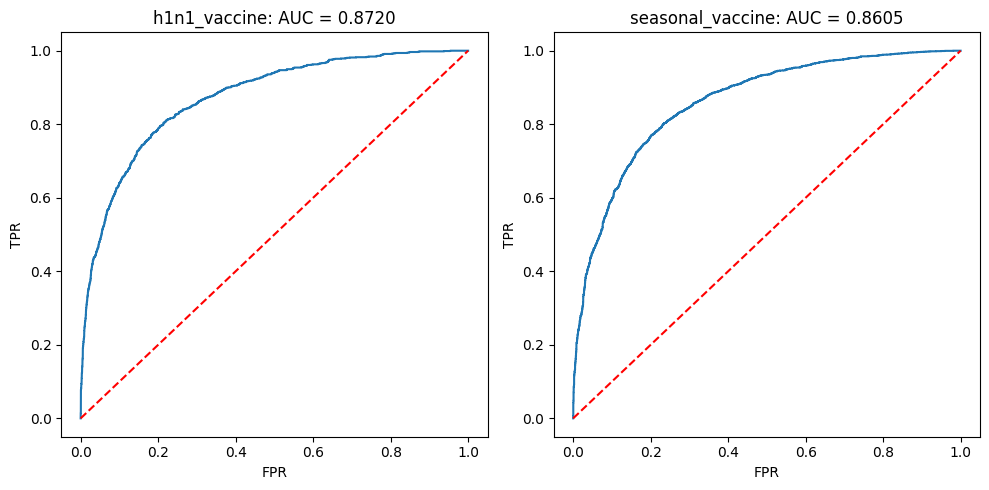

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

plot_roc(
    y_test['h1n1_vaccine'],
    y_preds['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax[0])

plot_roc(
    y_test['seasonal_vaccine'],
    y_preds['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax[1])

fig.tight_layout()

In [40]:
estimators.fit(X_train_df, training_set_labels_df)
preds = estimators.predict_proba(X_test_df)
preds

[array([[0.8262844 , 0.1737156 ],
        [0.95884906, 0.04115094],
        [0.84642572, 0.15357428],
        ...,
        [0.80445439, 0.19554561],
        [0.97510017, 0.02489983],
        [0.45822744, 0.54177256]]),
 array([[0.79716195, 0.20283805],
        [0.97125027, 0.02874973],
        [0.29902878, 0.70097122],
        ...,
        [0.80992159, 0.19007841],
        [0.71913415, 0.28086585],
        [0.35925807, 0.64074193]])]

In [41]:
y_preds = pd.DataFrame(
    {
        'h1n1_vaccine': preds[0][:,1],
        'seasonal_vaccine':preds[1][:,1],
    },
    index=X_test_df.index
)
print('y_preds.shape:', y_preds.shape)
y_preds.head()

y_preds.shape: (26708, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.173716,0.202838
26708,0.041151,0.028750
26709,0.153574,0.700971
26710,0.708312,0.900838
26711,0.177856,0.451994


In [42]:
y_preds.to_csv('../results/pred_hist_gradient_boosting.csv', index = True)